## Problem Statement

**The dataset 'asiacup.csv' contains columns as Team, ground,runs scored, opponent, runrate etc
our predictor variable is 'Result'.**

**using the given dataset about the scores of asia cup, we will visualize the data 
and then clean it if there are any nans or duplicates. \
And then after data preprocessing , we will try different models \
to make predictions.**

In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import recall_score, roc_auc_score, roc_curve, f1_score, accuracy_score, cohen_kappa_score, precision_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [2]:
data=pd.read_csv('asiacup.csv')
data.head(2)

,Team,Opponent,Format,Ground,Year,Toss,Selection,Run Scored,Wicket Lost,Fours,Sixes,Extras,Run Rate,Avg Bat Strike Rate,Highest Score,Wicket Taken,Given Extras,Highest Individual wicket,Player Of The Match,Result
0,Pakistan,Sri Lanka,ODI,Sharjah,1984,Lose,Batting,187.0,9.0,9.0,3.0,21.0,4.06,52.04,47.0,5.0,26.0,2.0,Roy Dias,Lose
1,Sri Lanka,Pakistan,ODI,Sharjah,1984,Win,Bowling,190.0,5.0,11.0,1.0,26.0,4.36,68.51,57.0,9.0,21.0,3.0,Roy Dias,Win


In [3]:
cat_cols=['Team', 'Opponent','Format','Ground','Year','Selection','Result']
num_cols=['Run Scored', 'Wicket Lost', 'Fours', 'Sixes', 'Extras', 'Run Rate',
       'Avg Bat Strike Rate', 'Highest Score', 'Wicket Taken', 'Given Extras',
       'Highest Individual wicket']

In [4]:
data.columns

Index(['Team', 'Opponent', 'Format', 'Ground', 'Year', 'Toss', 'Selection',
       'Run Scored', 'Wicket Lost', 'Fours', 'Sixes', 'Extras', 'Run Rate',
       'Avg Bat Strike Rate', 'Highest Score', 'Wicket Taken', 'Given Extras',
       'Highest Individual wicket', 'Player Of The Match', 'Result'],
      dtype='object')

In [5]:
# Lets create one user defined function to do univarate analysis of cat_columns 

In [6]:
def plot_cats(data, cat_cols):
    value_cnt= data[cat_cols].value_counts()
    labels=value_cnt.index
    vals=value_cnt.values
    val_df=pd.DataFrame({'cat_cols':labels,'count':vals})
    plt.figure(figsize=[7,6])
    plt.subplot(1,2,1)
    sns.barplot(val_df)
    plt.title(f'plot of {cat_cols}')
    plt.subplot(1,2,2)
    plt.pie(vals, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(f'the chart of {cat_cols}')
    plt.tight_layout()
    plt.show()
    return val_df
    
    

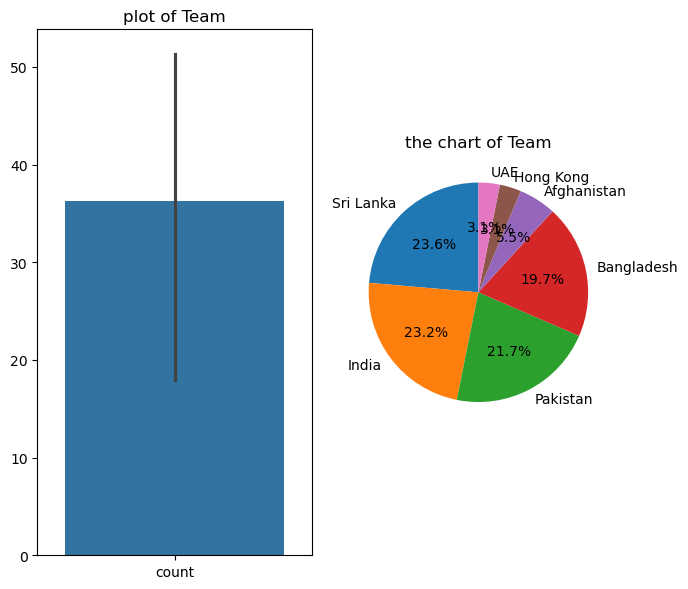

,cat_cols,count
0,Sri Lanka,60
1,India,59
2,Pakistan,55
3,Bangladesh,50
4,Afghanistan,14
5,Hong Kong,8
6,UAE,8


In [7]:
plot_cats(data, 'Team')

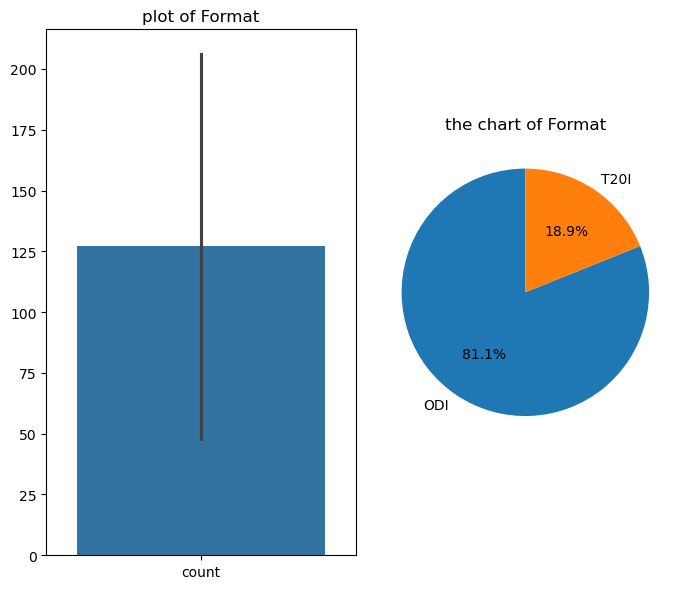

,cat_cols,count
0,ODI,206
1,T20I,48


In [8]:
plot_cats(data, 'Format')

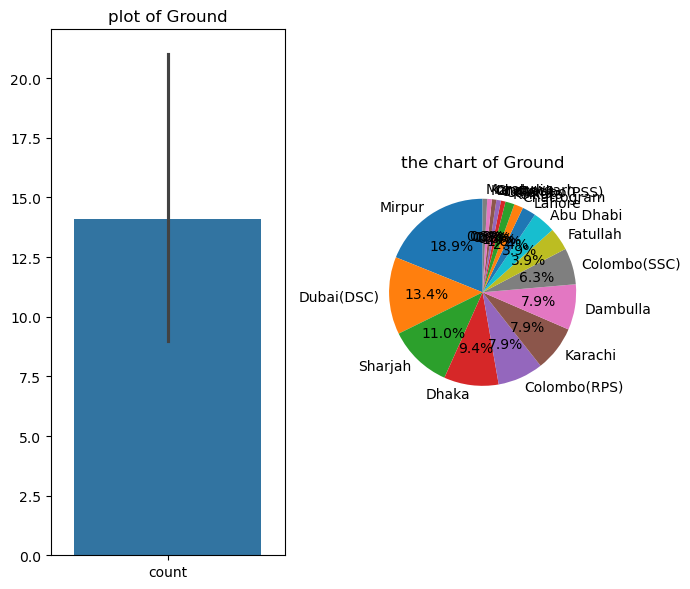

,cat_cols,count
0,Mirpur,48
1,Dubai(DSC),34
2,Sharjah,28
3,Dhaka,24
4,Colombo(RPS),20
5,Karachi,20
6,Dambulla,20
7,Colombo(SSC),16
8,Fatullah,10
9,Abu Dhabi,10


In [9]:
plot_cats(data, 'Ground')

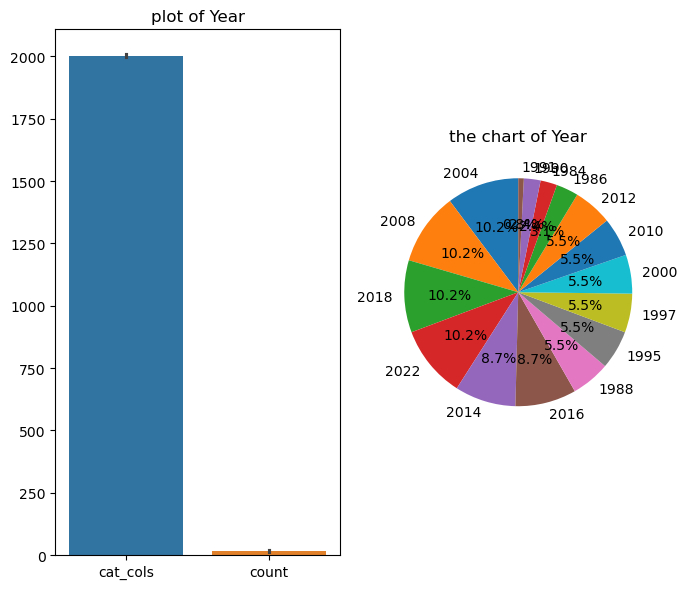

,cat_cols,count
0,2004,26
1,2008,26
2,2018,26
3,2022,26
4,2014,22
5,2016,22
6,1988,14
7,1995,14
8,1997,14
9,2000,14


In [10]:
plot_cats(data, 'Year')

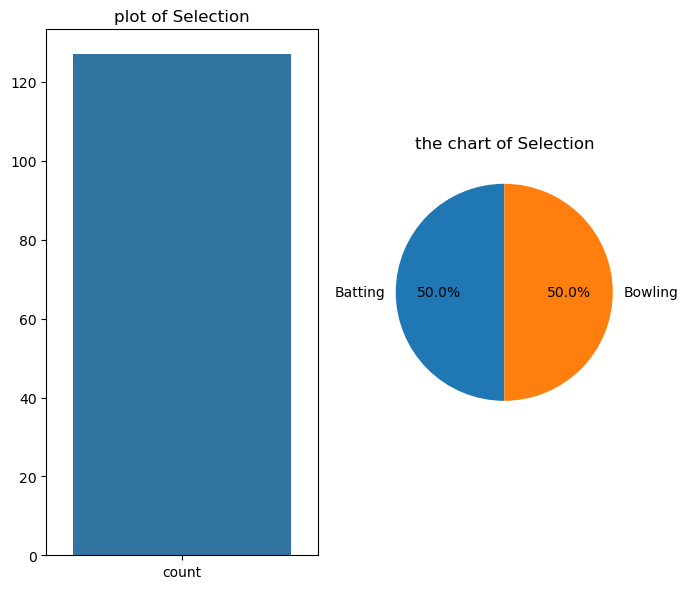

,cat_cols,count
0,Batting,127
1,Bowling,127


In [11]:
plot_cats(data, 'Selection')

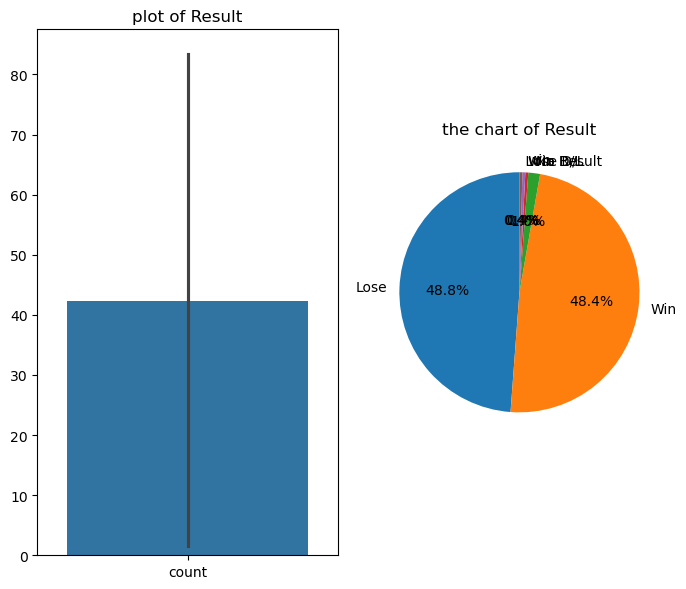

,cat_cols,count
0,Lose,124
1,Win,123
2,No Result,4
3,win,1
4,Win D/L,1
5,Lose D/L,1


In [12]:
plot_cats(data, 'Result')

## Preprocessing

In [13]:
data['Result'].unique()     #target column.

array(['Lose', 'Win', 'win', 'No Result', ' Win D/L', ' Lose D/L'],
      dtype=object)

In [15]:
data['Result'].value_counts()

Result
Lose         124
Win          123
No Result      4
win            1
 Win D/L       1
 Lose D/L      1
Name: count, dtype: int64

In [16]:
data['Result']=data['Result'].str.strip().str.title()

In [17]:
data['Result'] = data['Result'].replace({
    ' Win D/L': 'Win',
    ' Lose D/L': 'Lose'
})
data = data[data['Result'].isin(['Win', 'Lose'])]

In [18]:
data['Result'].unique()

array(['Lose', 'Win'], dtype=object)

In [19]:
data.columns

Index(['Team', 'Opponent', 'Format', 'Ground', 'Year', 'Toss', 'Selection',
       'Run Scored', 'Wicket Lost', 'Fours', 'Sixes', 'Extras', 'Run Rate',
       'Avg Bat Strike Rate', 'Highest Score', 'Wicket Taken', 'Given Extras',
       'Highest Individual wicket', 'Player Of The Match', 'Result'],
      dtype='object')

In [20]:
data.drop(columns=['Player Of The Match','Highest Individual wicket','Ground','Year'], inplace=True)

In [21]:
data.head()

,Team,Opponent,Format,Toss,Selection,Run Scored,Wicket Lost,Fours,Sixes,Extras,Run Rate,Avg Bat Strike Rate,Highest Score,Wicket Taken,Given Extras,Result
0,Pakistan,Sri Lanka,ODI,Lose,Batting,187.0,9.0,9.0,3.0,21.0,4.06,52.04,47.0,5.0,26.0,Lose
1,Sri Lanka,Pakistan,ODI,Win,Bowling,190.0,5.0,11.0,1.0,26.0,4.36,68.51,57.0,9.0,21.0,Win
2,India,Sri Lanka,ODI,Win,Bowling,97.0,0.0,9.0,0.0,14.0,4.47,60.48,51.0,10.0,8.0,Win
3,Sri Lanka,India,ODI,Lose,Batting,96.0,10.0,7.0,0.0,8.0,2.34,25.74,38.0,0.0,14.0,Lose
4,India,Pakistan,ODI,Win,Batting,188.0,4.0,13.0,3.0,17.0,4.08,60.21,56.0,10.0,5.0,Win


In [22]:
data.drop(columns=['Team', 'Opponent'], inplace=True)

In [23]:
data.head()

,Format,Toss,Selection,Run Scored,Wicket Lost,Fours,Sixes,Extras,Run Rate,Avg Bat Strike Rate,Highest Score,Wicket Taken,Given Extras,Result
0,ODI,Lose,Batting,187.0,9.0,9.0,3.0,21.0,4.06,52.04,47.0,5.0,26.0,Lose
1,ODI,Win,Bowling,190.0,5.0,11.0,1.0,26.0,4.36,68.51,57.0,9.0,21.0,Win
2,ODI,Win,Bowling,97.0,0.0,9.0,0.0,14.0,4.47,60.48,51.0,10.0,8.0,Win
3,ODI,Lose,Batting,96.0,10.0,7.0,0.0,8.0,2.34,25.74,38.0,0.0,14.0,Lose
4,ODI,Win,Batting,188.0,4.0,13.0,3.0,17.0,4.08,60.21,56.0,10.0,5.0,Win


In [24]:
data['Format'].unique()

array(['ODI', 'T20I'], dtype=object)

In [25]:
data.isnull().sum()

Format                 0
Toss                   0
Selection              0
Run Scored             0
Wicket Lost            0
Fours                  0
Sixes                  0
Extras                 0
Run Rate               0
Avg Bat Strike Rate    0
Highest Score          0
Wicket Taken           0
Given Extras           0
Result                 0
dtype: int64

In [26]:
data.shape

(248, 14)

In [28]:
data.duplicated().sum()

0

In [29]:
data['Format']= data['Format'].map({'ODI':0, 'T20I':1 })

In [30]:
data['Format'].unique()

array([0, 1], dtype=int64)

In [31]:
data['Toss'].unique()

array(['Lose', 'Win', 'win'], dtype=object)

In [32]:
data['Toss']=data['Toss'].str.strip().str.title()

In [33]:
data['Toss'].unique()

array(['Lose', 'Win'], dtype=object)

In [34]:
data['Toss']=data['Toss'].map({'Lose':0, 'Win':1})

In [35]:
data['Toss'].unique()

array([0, 1], dtype=int64)

In [36]:
data['Selection'].unique()

array(['Batting', 'Bowling'], dtype=object)

In [37]:
data['Selection']=data['Selection'].map({'Batting':1,'Bowling':0})

In [38]:
data['Selection'].unique()

array([1, 0], dtype=int64)

In [39]:
data['Result'].unique()

array(['Lose', 'Win'], dtype=object)

In [40]:
data['Result']=data['Result'].map({'Lose':0,'Win':1})

In [41]:
data['Result'].unique()

array([0, 1], dtype=int64)

In [42]:
data.head()

,Format,Toss,Selection,Run Scored,Wicket Lost,Fours,Sixes,Extras,Run Rate,Avg Bat Strike Rate,Highest Score,Wicket Taken,Given Extras,Result
0,0,0,1,187.0,9.0,9.0,3.0,21.0,4.06,52.04,47.0,5.0,26.0,0
1,0,1,0,190.0,5.0,11.0,1.0,26.0,4.36,68.51,57.0,9.0,21.0,1
2,0,1,0,97.0,0.0,9.0,0.0,14.0,4.47,60.48,51.0,10.0,8.0,1
3,0,0,1,96.0,10.0,7.0,0.0,8.0,2.34,25.74,38.0,0.0,14.0,0
4,0,1,1,188.0,4.0,13.0,3.0,17.0,4.08,60.21,56.0,10.0,5.0,1


In [45]:
# now all our columns are encoded and numerical. 

In [ ]:
# lets check for any skewness in our numerical cols:

In [43]:
data.columns

Index(['Format', 'Toss', 'Selection', 'Run Scored', 'Wicket Lost', 'Fours',
       'Sixes', 'Extras', 'Run Rate', 'Avg Bat Strike Rate', 'Highest Score',
       'Wicket Taken', 'Given Extras', 'Result'],
      dtype='object')

In [46]:
num1=['Run Scored', 'Wicket Lost', 'Fours',
       'Sixes', 'Extras']
num2=['Run Rate', 'Avg Bat Strike Rate', 'Highest Score',
       'Wicket Taken', 'Given Extras']

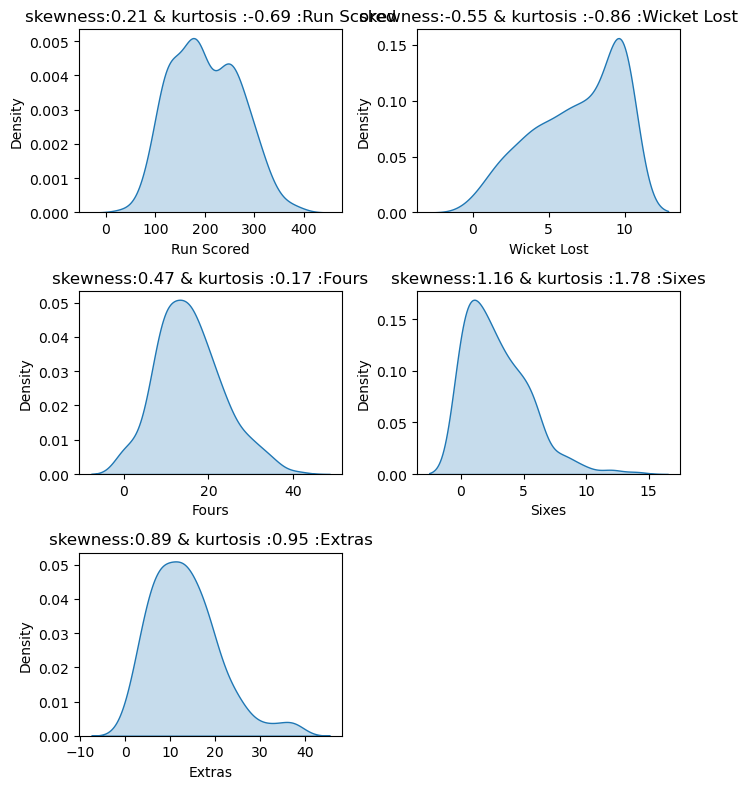

In [53]:
t=1
plt.figure(figsize=[7,8])
for i in num1:
    plt.subplot(3,2,t)
    sns.kdeplot(data, x=i, fill=True)
    s,k= data[i].skew(), data[i].kurt() 
    plt.title(f'skewness:{round(s,2)} & kurtosis :{round(k,2)} :{i}')
    t+=1
plt.tight_layout()
plt.show()

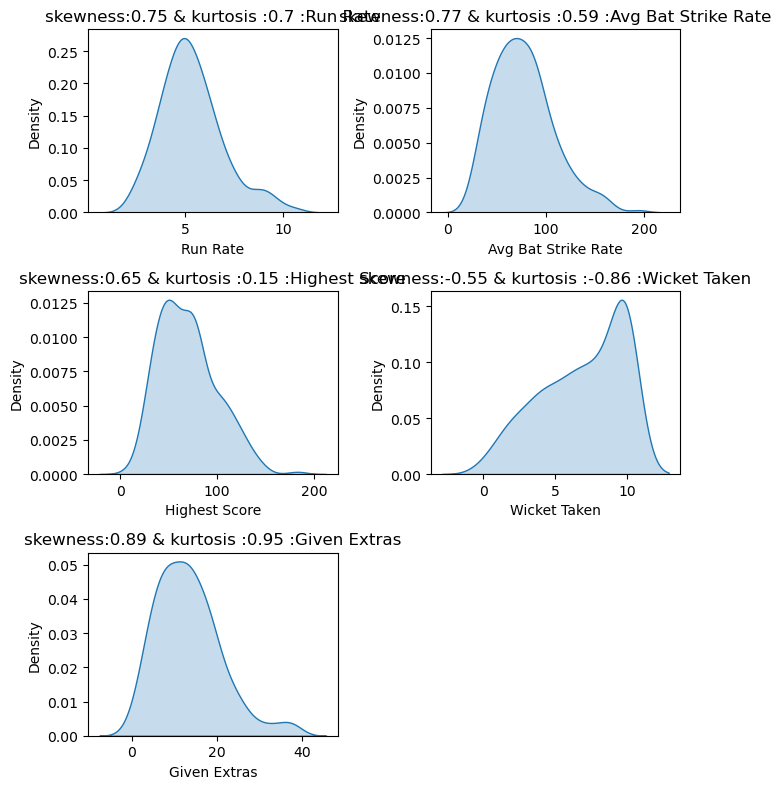

In [54]:
t=1
plt.figure(figsize=[7,8])
for i in num2:
    plt.subplot(3,2,t)
    sns.kdeplot(data, x=i, fill=True)
    s,k= data[i].skew(), data[i].kurt() 
    plt.title(f'skewness:{round(s,2)} & kurtosis :{round(k,2)} :{i}')
    t+=1
plt.tight_layout()
plt.show()

In [55]:
# There is no skewness as such. so we can proceed.

In [56]:
# outlier check

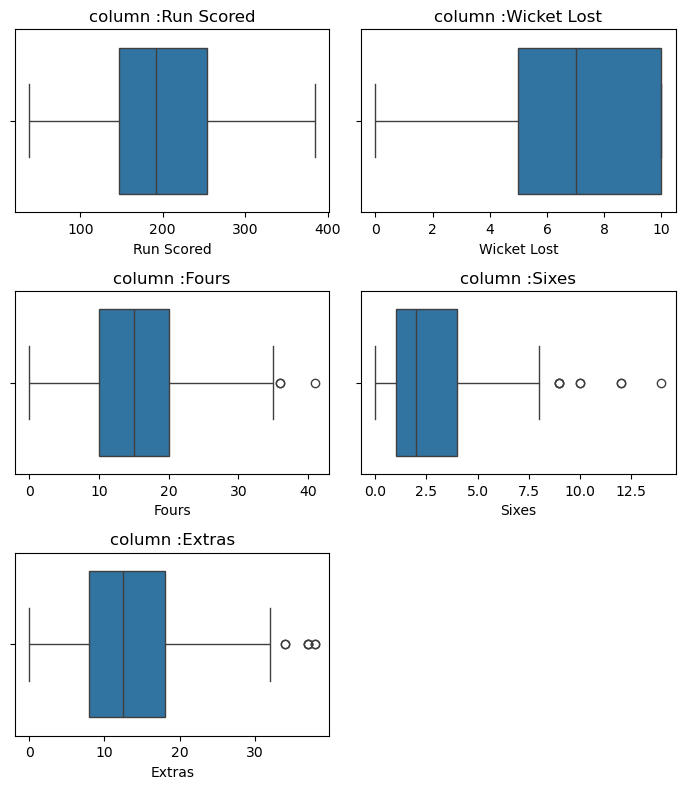

In [57]:
t=1
plt.figure(figsize=[7,8])
for i in num1:
    plt.subplot(3,2,t)
    sns.boxplot(data, x=i) 
    plt.title(f'column :{i}')
    t+=1
plt.tight_layout()
plt.show()

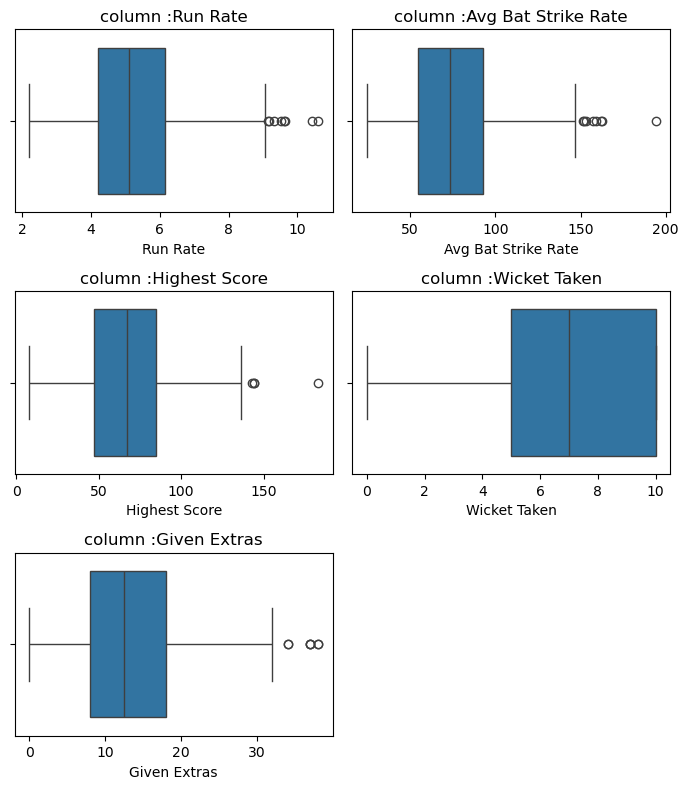

In [58]:
t=1
plt.figure(figsize=[7,8])
for i in num2:
    plt.subplot(3,2,t)
    sns.boxplot(data, x=i) 
    plt.title(f'column :{i}')
    t+=1
plt.tight_layout()
plt.show()

In [ ]:
# lets first split the dataset to train and test datasets.

In [60]:
y= data['Result']
x=data.drop(columns='Result')

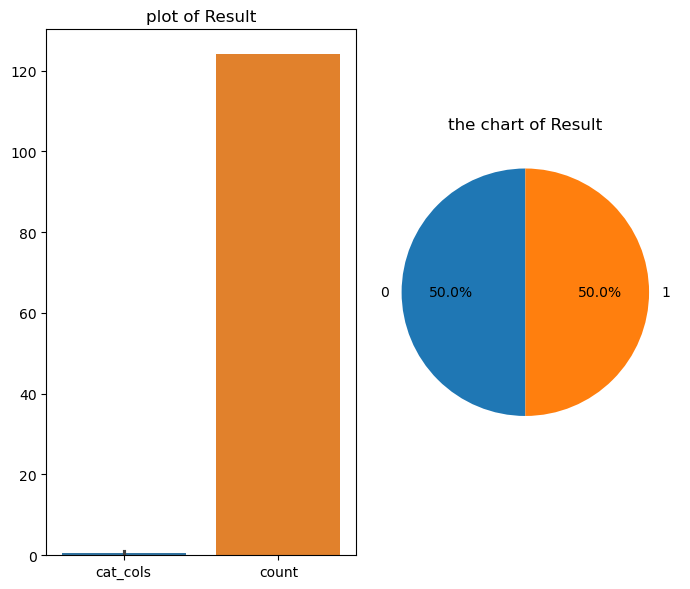

,cat_cols,count
0,0,124
1,1,124


In [63]:
plot_cats(data, 'Result')

In [ ]:
# Target variable is balanced.

In [62]:
y

0      0
1      1
2      1
3      0
4      1
      ..
249    1
250    0
251    1
252    0
253    1
Name: Result, Length: 248, dtype: int64

In [64]:
x_train, x_test, y_train, y_test= train_test_split(x,y, train_size=0.7, stratify=y)

In [65]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(173, 13) (75, 13) (173,) (75,)


In [67]:
x_train.columns

Index(['Format', 'Toss', 'Selection', 'Run Scored', 'Wicket Lost', 'Fours',
       'Sixes', 'Extras', 'Run Rate', 'Avg Bat Strike Rate', 'Highest Score',
       'Wicket Taken', 'Given Extras'],
      dtype='object')

In [68]:
x_train=x_train.drop(columns=['Fours','Sixes', 'Extras','Highest Score'], axis=1)
x_test=x_test.drop(columns=['Fours','Sixes', 'Extras','Highest Score'], axis=1)

In [69]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((173, 9), (75, 9), (173,), (75,))

In [70]:
# Now, let's cap the outliers in train dataset:
x_train.head()

,Format,Toss,Selection,Run Scored,Wicket Lost,Run Rate,Avg Bat Strike Rate,Wicket Taken,Given Extras
4,0,1,1,188.0,4.0,4.08,60.21,10.0,5.0
77,0,0,0,238.0,10.0,5.25,61.80,4.0,17.0
12,0,1,0,195.0,5.0,4.60,62.09,9.0,14.0
158,0,0,0,284.0,10.0,5.81,101.36,6.0,18.0
239,1,0,1,193.0,2.0,9.65,152.98,10.0,10.0


In [72]:
x_train.columns

Index(['Format', 'Toss', 'Selection', 'Run Scored', 'Wicket Lost', 'Run Rate',
       'Avg Bat Strike Rate', 'Wicket Taken', 'Given Extras'],
      dtype='object')

In [73]:
num=['Avg Bat Strike Rate', 'Run Rate','Given Extras']

In [74]:
#capping/winsorizing:
for i in num:
    q1,q3= x_train[i].quantile(0.25), x_train[i].quantile(0.75)
    iqr=q3-q1
    ul,ll= q3+1.5*iqr, q1-1.5*iqr
    x_train[i]= x_train[i].apply(lambda x:ul if x>ul else ll if x<ll else x)

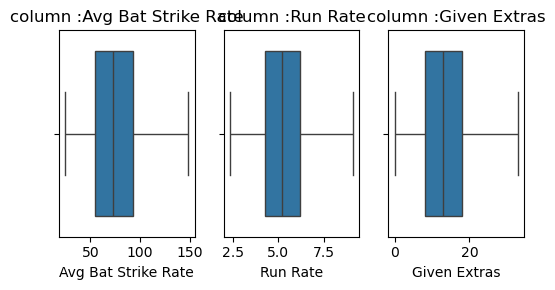

In [78]:
t=1
plt.figure(figsize=[5,3])
for i in num:
    plt.subplot(1,3,t)
    sns.boxplot(x_train, x=i) 
    plt.title(f'column :{i}')
    t+=1
plt.tight_layout()
plt.show()

## let's begin the modeling part:

In [87]:
# user defined function to validate the models:
m=[]
acu=[]
rec=[]
pre=[]
f1=[]
kap=[]
def model_validation(model,xtrain,ytrain,xtest,ytest):
    mod=model
    mod.fit(xtrain,ytrain)
    pred_s=mod.predict_proba(xtest)[:,1]
    pred_h=mod.predict(xtest)
    print(confusion_matrix(ytest, pred_h))
    print(classification_report(ytest, pred_h))

    fpr, tpr, thres= roc_curve(ytest, pred_s)
    plt.plot(fpr, tpr)
    plt.plot([0,1],[0,1],color='red',ls='--')
    plt.title(f'the score is {round(roc_auc_score(ytest, pred_s),3)}')
    plt.show()

    response = input("do you want to save this mode ? Y or N?")
    if response.lower()=='y':
        global scorecard
        m.append(str(model))
        acu.append(accuracy_score(ytest, pred_h))
        pre.append(precision_score(ytest, pred_h))
        rec.append(recall_score(ytest, pred_h))
        f1.append(f1_score(ytest, pred_h))
        kap.append(cohen_kappa_score(ytest, pred_h))
        scorecard= pd.DataFrame({'model':m, 'Acu':acu, 'Pre':pre, 'Rec':rec, 'F1':f1, 'Cohen':kap})
    else:
        return
                   
                   
        

[[30  7]
 [ 5 33]]
              precision    recall  f1-score   support

           0       0.86      0.81      0.83        37
           1       0.82      0.87      0.85        38

    accuracy                           0.84        75
   macro avg       0.84      0.84      0.84        75
weighted avg       0.84      0.84      0.84        75



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


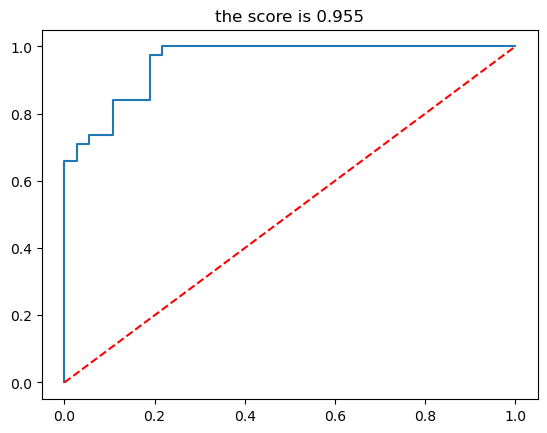

do you want to save this mode ? Y or N? y


In [88]:
model_validation(LogisticRegression(),x_train,y_train,x_test,y_test)

[[33  4]
 [ 6 32]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        37
           1       0.89      0.84      0.86        38

    accuracy                           0.87        75
   macro avg       0.87      0.87      0.87        75
weighted avg       0.87      0.87      0.87        75



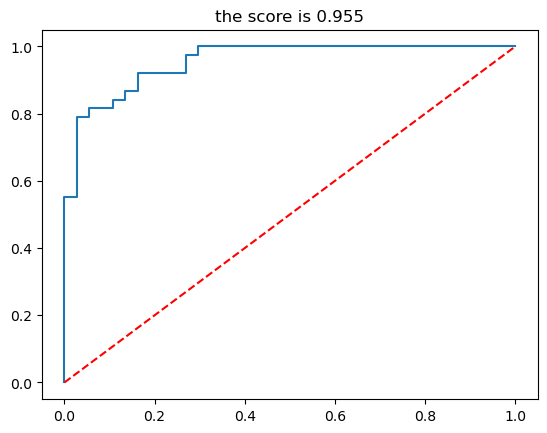

do you want to save this mode ? Y or N? n


In [89]:
model_validation(GaussianNB(),x_train,y_train,x_test,y_test)

[[21 16]
 [18 20]]
              precision    recall  f1-score   support

           0       0.54      0.57      0.55        37
           1       0.56      0.53      0.54        38

    accuracy                           0.55        75
   macro avg       0.55      0.55      0.55        75
weighted avg       0.55      0.55      0.55        75



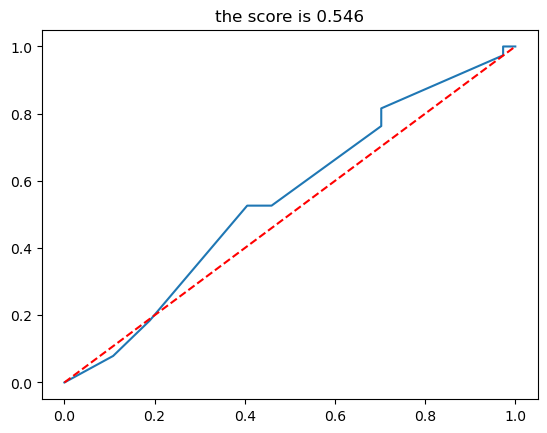

do you want to save this mode ? Y or N? n


In [90]:
model_validation(BernoulliNB(),x_train,y_train,x_test,y_test)

[[31  6]
 [ 7 31]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        37
           1       0.84      0.82      0.83        38

    accuracy                           0.83        75
   macro avg       0.83      0.83      0.83        75
weighted avg       0.83      0.83      0.83        75



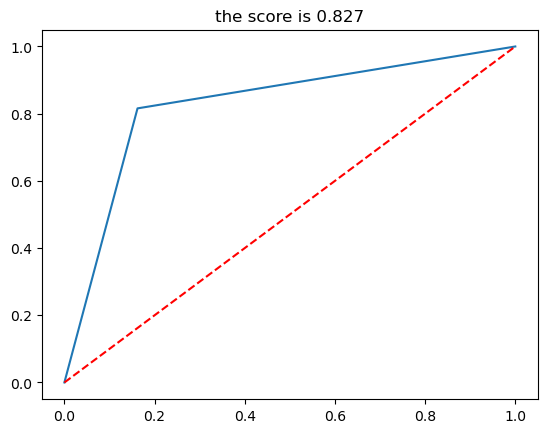

do you want to save this mode ? Y or N? n


In [93]:
model_validation(DecisionTreeClassifier(max_depth=10),x_train,y_train,x_test,y_test)

[[29  8]
 [ 2 36]]
              precision    recall  f1-score   support

           0       0.94      0.78      0.85        37
           1       0.82      0.95      0.88        38

    accuracy                           0.87        75
   macro avg       0.88      0.87      0.87        75
weighted avg       0.88      0.87      0.87        75



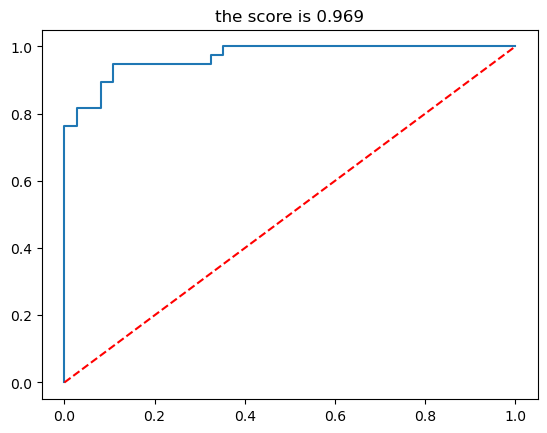

do you want to save this mode ? Y or N? y


In [94]:
model_validation(RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=5),x_train,y_train,x_test,y_test)

In [95]:
scorecard

,model,Acu,Pre,Rec,F1,Cohen
0,LogisticRegression(),0.840000,0.825000,0.868421,0.846154,0.679715
1,"RandomForestClassifier(criterion='entropy', ma...",0.866667,0.818182,0.947368,0.878049,0.732716


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[[32  5]
 [ 6 32]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        37
           1       0.86      0.84      0.85        38

    accuracy                           0.85        75
   macro avg       0.85      0.85      0.85        75
weighted avg       0.85      0.85      0.85        75



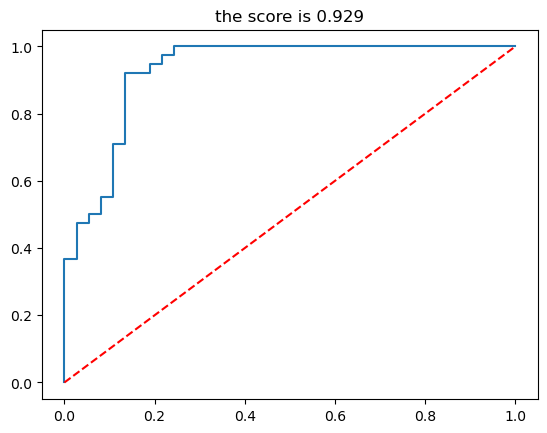

do you want to save this mode ? Y or N? y


In [96]:
model_validation(AdaBoostClassifier(n_estimators=100),x_train, y_train,x_test,y_test)

[[31  6]
 [ 5 33]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        37
           1       0.85      0.87      0.86        38

    accuracy                           0.85        75
   macro avg       0.85      0.85      0.85        75
weighted avg       0.85      0.85      0.85        75



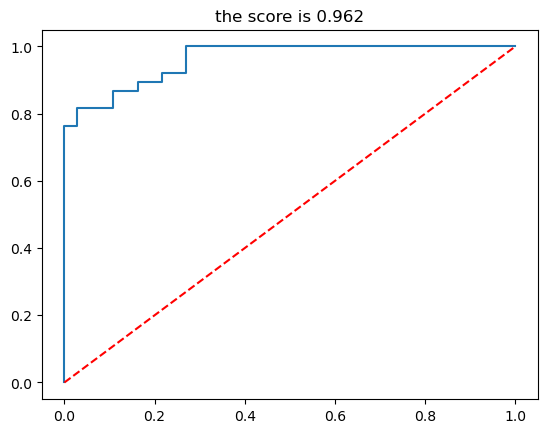

do you want to save this mode ? Y or N? y


In [105]:
model_validation(GradientBoostingClassifier(n_estimators=200, learning_rate=0.1,max_depth=5),x_train, y_train,x_test,y_test)

In [108]:
scorecard

,model,Acu,Pre,Rec,F1,Cohen
0,LogisticRegression(),0.840000,0.825000,0.868421,0.846154,0.679715
1,"RandomForestClassifier(criterion='entropy', ma...",0.866667,0.818182,0.947368,0.878049,0.732716
2,AdaBoostClassifier(n_estimators=100),0.853333,0.864865,0.842105,0.853333,0.706719
3,"GradientBoostingClassifier(max_depth=5, n_esti...",0.840000,0.825000,0.868421,0.846154,0.679715
4,"GradientBoostingClassifier(max_depth=5, n_esti...",0.853333,0.846154,0.868421,0.857143,0.706510


In [ ]:
# Let's go with RandomForestClassifier. 

In [109]:
model= RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=5)
model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5)

In [110]:
pred_s_rf=model.predict_proba(x_test)[:,1]
pred_h_rf=model.predict(x_test)

In [112]:
x_train.columns

Index(['Format', 'Toss', 'Selection', 'Run Scored', 'Wicket Lost', 'Run Rate',
       'Avg Bat Strike Rate', 'Wicket Taken', 'Given Extras'],
      dtype='object')

In [118]:
prediction=pd.DataFrame([{'Format':1, 'Toss':0, 'Selection':1, 'Run Scored':235, 'Wicket Lost':6, 'Run Rate':11.6,
       'Avg Bat Strike Rate':137.5, 'Wicket Taken':5, 'Given Extras':4}])

In [119]:
final_pred=model.predict(prediction)
if final_pred==1:
    print('Match won')
else:
    print('Match Lost')

Match Lost
